## Линейная функция активации



обучающая функция определяется формулой для весовых коэффициентов:

w = w + learning_rate * (expected - predicted) * x

Коэффициент learning_rate вводится так как иначе результат не будет сходиться к правильному и с каждым циклом уходить в бесконечность. Этот коэффициент надо брать заметно меньше 1.

In [1]:
import numpy as np
training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = np.array([[0, 1, 1, 0]]).T

synaptic_weights = np.array([[0.], [0.], [0.]]) # array(3,1) # создать нулевой, а потом уже смотреть со случайным заполнением.
#np.random.seed(1)
#synaptic_weights = 2 * np.random.random((3, 1)) - 1

l_rate = 0.1
for iteration in range(1000): # 10000
    output = np.dot(training_set_inputs, synaptic_weights)
    error = training_set_outputs - output
    synaptic_weights += np.dot(training_set_inputs.T, l_rate*error)
    if iteration < 5:
        print (f'Промежуточный результат {np.dot(np.array([1, 0, 0]), synaptic_weights)}')
        deviation =  np.sum(np.multiply(error,error)) # среднеквадратичное отклонение        
        print(f'error = {deviation:.3f}')

print (f'Итоговый результат {np.dot(np.array([1, 0, 0]), synaptic_weights)}')


Промежуточный результат [0.2]
error = 2.000
Промежуточный результат [0.31]
error = 0.740
Промежуточный результат [0.384]
error = 0.493
Промежуточный результат [0.4419]
error = 0.394
Промежуточный результат [0.4912]
error = 0.325
Итоговый результат [1.]


Постепенно ошибка уменьшается, и ответ приближается к "1".

Если l_rate больше чем 0.5 то расчет идет в разнос.

Можно воспользоваться и логистической функцией:

## Логистическая активационная функция

Выходное значение:

output = 1 / (1 + exp(-(dot(train_i, link_w))))
   
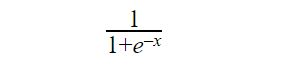

или

 
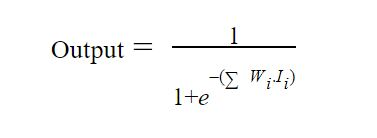

Для вычисления поправки к весовым коэффициентам (тут нужна производная функции)
$$f(x)=\sigma (x)={\frac {1}{1+e^{-x}}}$$
$$f'(x)=f(x)(1-f(x))$$


In [5]:
import numpy as np

training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = np.array([[0, 1, 1, 0]]).T

synaptic_weights = np.array([[0.], [0.], [0.]]) # array(3,1) # создать нулевой, а потом уже смотреть со случайным заполнением.
#np.random.seed(1)
#synaptic_weights = 2 * np.random.random((3, 1)) - 1


for iteration in range(10000):
    output = 1 / (1 + np.exp(-(np.dot(training_set_inputs, synaptic_weights))))
    error = training_set_outputs - output
    synaptic_weights += np.dot(training_set_inputs.T, error * output * (1 - output))




print (1 / (1 + np.exp(-(np.dot(np.array([1, 0, 0]), synaptic_weights))))) 


[0.99993703]


Результат также приблизился к 1.